Setup environment

In [1]:
import os
!pip install nuscenes-devkit tensorboardX timm efficientnet_pytorch lyft-dataset-sdk
!rm -rf /data/sets/nuscenes/mini/*
!mkdir -p /data/sets/nuscenes/mini

%cd /data/sets/nuscenes/mini
!wget -O v1.0-mini.tgz https://www.nuscenes.org/data/v1.0-mini.tgz

!tar -xf v1.0-mini.tgz

import os
if os.path.exists("/data/sets/nuscenes/mini/maps"):
    print("SUCCESS")
else:
    print("ERROR")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 7.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.0/316.0 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━

/data/sets/nuscenes/mini
--2025-12-16 16:14:32--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 13.32.205.38, 13.32.205.98, 13.32.205.100, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|13.32.205.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G   174MB/s    in 19s     

2025-12-16 16:14:51 (207 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]

SUCCESS


In [2]:
%cd /content

!git clone https://github.com/aharley/simple_bev.git

%cd simple_bev

!sh get_rgb_model.sh
!sh get_rad_model.sh

!ls checkpoints/

/content
Cloning into 'simple_bev'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 375 (delta 42), reused 45 (delta 41), pack-reused 326 (from 1)
Receiving objects: 100% (375/375), 144.00 KiB | 2.88 MiB/s, done.
Resolving deltas: 100% (224/224), done.
/content/simple_bev
downloading rgb model from dropbox...
--2025-12-16 16:15:38--  https://www.dropbox.com/s/n93ryvrqyiram56/rgb_checkpoint.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/k4pk5szq7i0gul2aqylb1/rgb_checkpoint.tar.gz?rlkey=6fmruxvsvh6nij3lfuyjn51ub [following]
--2025-12-16 16:15:38--  https://www.dropbox.com/scl/fi/k4pk5szq7i0gul2aqylb1/rgb_checkpoint.tar.gz?rlkey=6fmruxvsvh6nij3lfuyjn51ub
Reusing existing con

In [3]:
import os
import gdown
import shutil

maps_dir = "/data/sets/nuscenes/mini/maps"
expansion_dir = os.path.join(maps_dir, "expansion")
os.makedirs(maps_dir, exist_ok=True)

file_id = '1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf'
url = f'https://drive.google.com/uc?id={file_id}'
output_zip = os.path.join(maps_dir, "nuScenes-map-expansion-v1.3.zip")

gdown.download(url, output_zip, quiet=False)

if os.path.exists(output_zip):
    !unzip -o "$output_zip" -d "$maps_dir"

    os.makedirs(expansion_dir, exist_ok=True)

    required_maps = [
        "singapore-onenorth.json",
        "boston-seaport.json",
        "singapore-hollandvillage.json",
        "singapore-queenstown.json"
    ]

    moved_count = 0
    for map_name in required_maps:
        src = os.path.join(maps_dir, map_name)
        dst = os.path.join(expansion_dir, map_name)

        if os.path.exists(src):
            shutil.move(src, dst)
            moved_count += 1
        elif os.path.exists(dst):
            moved_count += 1

    print(f"\nMaps downloaded! .")
    !ls -lh "$expansion_dir"
else:
    print("Error: map downloading failed")

Downloading...
From (original): https://drive.google.com/uc?id=1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf
From (redirected): https://drive.google.com/uc?id=1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf&confirm=t&uuid=458895b7-93a8-4cb9-bf80-2c4884a269aa
To: /data/sets/nuscenes/mini/maps/nuScenes-map-expansion-v1.3.zip
100%|██████████| 399M/399M [00:05<00:00, 76.6MB/s]


Archive:  /data/sets/nuscenes/mini/maps/nuScenes-map-expansion-v1.3.zip
   creating: /data/sets/nuscenes/mini/maps/basemap/
  inflating: /data/sets/nuscenes/mini/maps/basemap/boston-seaport.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-hollandvillage.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-queenstown.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-onenorth.png  
   creating: /data/sets/nuscenes/mini/maps/expansion/
  inflating: /data/sets/nuscenes/mini/maps/expansion/boston-seaport.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-onenorth.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-queenstown.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-hollandvillage.json  
   creating: /data/sets/nuscenes/mini/maps/prediction/
  inflating: /data/sets/nuscenes/mini/maps/prediction/prediction_scenes.json  
  inflating: /data/sets/nuscenes/mini/maps/LICENSE  

Maps d

Robustness test (ideal, low light, random camera fail)

In [14]:
%cd /content/simple_bev

code_robust_final = """
import os
import time
import argparse
import numpy as np
import saverloader
from fire import Fire
from nets.segnet import Segnet
import utils.misc
import utils.improc
import utils.vox
import random
import nuscenesdataset
import torch
torch.multiprocessing.set_sharing_strategy('file_system')
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Asetetaan siemenet toistettavuutta varten
# Mutta random_fail tarvitsee vaihtelua loopissa, hoidamme sen funktiossa
random.seed(125)
np.random.seed(125)
torch.manual_seed(125)

# Asetukset
scene_centroid = torch.tensor([0.0, 1.0, 0.0]).reshape([1, 3]).float()
bounds = (-50, 50, -5, 5, -50, 50)
Z, Y, X = 200, 8, 200
max_dist = 50
num_bins = 5
bin_size = max_dist/num_bins

def apply_corruption(imgs, mode):
    # imgs shape: (B, T, S, C, H, W)

    if mode == 'clean':
        return imgs

    elif mode == 'dark':
        # Yö-simulaatio
        return imgs * 0.1

    elif mode == 'random_fail':
        # Satunnainen kameravika (random single camera failure)
        imgs = imgs.clone()
        B = imgs.shape[0]

        # Koska batch size on evaluaatiossa usein 1, arvotaan tässä.
        # Jos B > 1, pitäisi loopata batchin yli, mutta tämä riittää nyt.
        broken_cam_idx = np.random.randint(0, 6)

        # Nollataan valittu kamera
        imgs[:, :, broken_cam_idx, :, :, :] = 0.0
        return imgs

    return imgs

def run_model(model, d, device='cuda:0', corruption='clean'):
    metrics = {}

    imgs, rots, trans, intrins, pts0, extra0, pts, extra, lrtlist_velo, vislist, tidlist, scorelist, seg_bev_g, valid_bev_g, center_bev_g, offset_bev_g, radar_data, egopose = d

    # --- SOVELLETAAN HÄIRIÖ ---
    imgs = apply_corruption(imgs, corruption)
    # --------------------------

    imgs = imgs[:,0].float().to(device) - 0.5
    seg_bev_g = seg_bev_g[:,0].to(device)
    valid_bev_g = valid_bev_g[:,0].to(device)

    B = imgs.shape[0]

    rots, trans, intrins = rots[:,0], trans[:,0], intrins[:,0]
    __p = lambda x: utils.basic.pack_seqdim(x, B)
    __u = lambda x: utils.basic.unpack_seqdim(x, B)
    intrins_ = __p(intrins)
    pix_T_cams_ = utils.geom.merge_intrinsics(*utils.geom.split_intrinsics(intrins_)).to(device)
    pix_T_cams = __u(pix_T_cams_)
    velo_T_cams = utils.geom.merge_rtlist(rots, trans).to(device)
    cam0_T_camXs = utils.geom.get_camM_T_camXs(velo_T_cams, ind=0)
    vox_util = utils.vox.Vox_util(Z, Y, X, scene_centroid=scene_centroid.to(device), bounds=bounds, assert_cube=False)

    rad_occ_mem0 = None
    if model.module.use_radar:
        radar_data = radar_data[:,0]
        rad_data = radar_data.to(device).permute(0, 2, 1)
        xyz_rad = rad_data[:,:,:3]
        meta_rad = rad_data[:,:,3:]
        cams_T_velo = __u(utils.geom.safe_inverse(__p(velo_T_cams)))
        rad_xyz_cam0 = utils.geom.apply_4x4(cams_T_velo[:,0], xyz_rad)
        rad_occ_mem0 = vox_util.voxelize_xyz_and_feats(rad_xyz_cam0, meta_rad, Z, Y, X, assert_cube=False)

    _, _, seg_bev_e, _, _ = model(
            rgb_camXs=imgs,
            pix_T_cams=pix_T_cams,
            cam0_T_camXs=cam0_T_camXs,
            vox_util=vox_util,
            rad_occ_mem0=rad_occ_mem0)

    seg_bev_e_round = torch.sigmoid(seg_bev_e).round()

    # Etäisyyskartta
    coords_mem = utils.basic.gridcloud3d(B,Z,1,X)
    coords_cam = vox_util.Mem2Ref(coords_mem, Z, Y, X)
    dists_cam = torch.norm(coords_cam, dim=2)
    dist_map = dists_cam.reshape(1, 1, Z, X).to(device)

    inter_map = seg_bev_e_round * seg_bev_g * valid_bev_g
    union_map = ((seg_bev_e_round + seg_bev_g) * valid_bev_g).clamp(0,1)

    dist_map_ = dist_map.reshape(-1)
    inter_map_ = inter_map.reshape(-1)
    union_map_ = union_map.reshape(-1)

    inters_ = torch.zeros(num_bins, dtype=torch.float32, device=device)
    unions_ = torch.zeros(num_bins, dtype=torch.float32, device=device)

    for bi in range(num_bins):
        bin_min = bin_size * bi
        bin_max = bin_size * (bi+1)
        inds = (dist_map_ > bin_min) & (dist_map_ < bin_max)
        inters_[bi] = inter_map_[inds].sum()
        unions_[bi] = union_map_[inds].sum()

    metrics['inters_'] = inters_.cpu().numpy()
    metrics['unions_'] = unions_.cpu().numpy()

    return metrics

def main(
        exp_name='eval_robust',
        dset='mini',
        data_dir='/data/sets/nuscenes',
        init_dir='',
        use_radar=False,
        corruption='clean',
        device_ids=[0],
):
    device = 'cuda:%d' % device_ids[0]

    final_dim = (int(224 * 2), int(400 * 2))
    data_aug_conf = {
        'final_dim': final_dim, 'H': 900, 'W': 1600,
        'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
        'ncams': 6,
    }
    _, val_dataloader = nuscenesdataset.compile_data(
        dset, data_dir, data_aug_conf=data_aug_conf,
        centroid=scene_centroid.numpy(), bounds=bounds, res_3d=(Z,Y,X),
        bsz=1, nworkers=2, shuffle=False, seqlen=1, nsweeps=5, get_tids=True
    )
    val_dataloader.dataset.data_root = os.path.join(data_dir, dset)
    val_iterloader = iter(val_dataloader)

    model = Segnet(Z, Y, X, use_radar=use_radar, use_metaradar=use_radar, encoder_type='res101')
    model = model.to(device)
    model = torch.nn.DataParallel(model, device_ids=device_ids)

    # Checkpoint lataus
    if os.path.isdir(init_dir):
        files = [f for f in os.listdir(init_dir) if f.endswith('.pth')]
        if files:
            ckpt_path = os.path.join(init_dir, files[0])
            print(f"Loading checkpoint: {ckpt_path}")
            checkpoint = torch.load(ckpt_path, map_location=device)
            if 'model_state_dict' in checkpoint:
                model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
            else:
                model.module.load_state_dict(checkpoint, strict=False)
    else:
        print(f"Loading checkpoint file: {init_dir}")
        checkpoint = torch.load(init_dir, map_location=device)
        if 'model_state_dict' in checkpoint:
            model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
        else:
            model.module.load_state_dict(checkpoint, strict=False)

    model.eval()

    inters_total = np.zeros(num_bins)
    unions_total = np.zeros(num_bins)

    max_iters = len(val_dataloader)
    print(f"--- Running Robustness Test: {corruption.upper()} (Radar={use_radar}) ---")

    for i in range(max_iters):
        try:
            sample = next(val_iterloader)
        except StopIteration:
            break

        with torch.no_grad():
            metrics = run_model(model, sample, device, corruption=corruption)

        inters_total += metrics['inters_']
        unions_total += metrics['unions_']

        if i % 20 == 0:
            print(f"Processing {i}/{max_iters}...")

    ious = inters_total / np.maximum(unions_total, 1.0) * 100

    result_list = list(np.round(ious, 2))
    mean_iou = np.mean(ious)

    print("-" * 30)
    print(f"RESULT_ARRAY = {result_list}")
    print(f"Mean IoU: {mean_iou:.2f}")
    print("-" * 30)

    # TALLENNUS TIEDOSTOON
    with open("robustness_final_results.txt", "a") as f:
        f.write(f"Experiment: {corruption.upper()}, Radar={use_radar}\\n")
        f.write(f"RESULT_ARRAY = {result_list}\\n")
        f.write(f"Mean IoU: {mean_iou:.2f}\\n")
        f.write("-" * 30 + "\\n")

if __name__ == '__main__':
    Fire(main)
"""

with open("eval_robust_final.py", "w") as f:
    f.write(code_robust_final)

/content/simple_bev


In [15]:
CKPT_CAM = 'checkpoints/8x5_5e-4_rgb12_22:43:46'
CKPT_RAD = 'checkpoints/8x5_5e-4_rad25_18:55:34'
!rm robustness_final_results.txt

print("1.  CAMERA ONLY  ")
!python eval_robust_final.py --init_dir="$CKPT_CAM" --use_radar=False --corruption='clean'
!python eval_robust_final.py --init_dir="$CKPT_CAM" --use_radar=False --corruption='dark'
!python eval_robust_final.py --init_dir="$CKPT_CAM" --use_radar=False --corruption='random_fail'

print("\n2.  CAMERA + RADAR  ")
!python eval_robust_final.py --init_dir="$CKPT_RAD" --use_radar=True --corruption='clean'
!python eval_robust_final.py --init_dir="$CKPT_RAD" --use_radar=True --corruption='dark'
!python eval_robust_final.py --init_dir="$CKPT_RAD" --use_radar=True --corruption='random_fail'


===== 1. RUNNING CAMERA ONLY EXPERIMENTS =====
loading nuscenes...
making parser...
indices (323, 1)
NuscData: 323 samples. Split: train.
                   Augmentation Conf: {'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
data ready
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 a

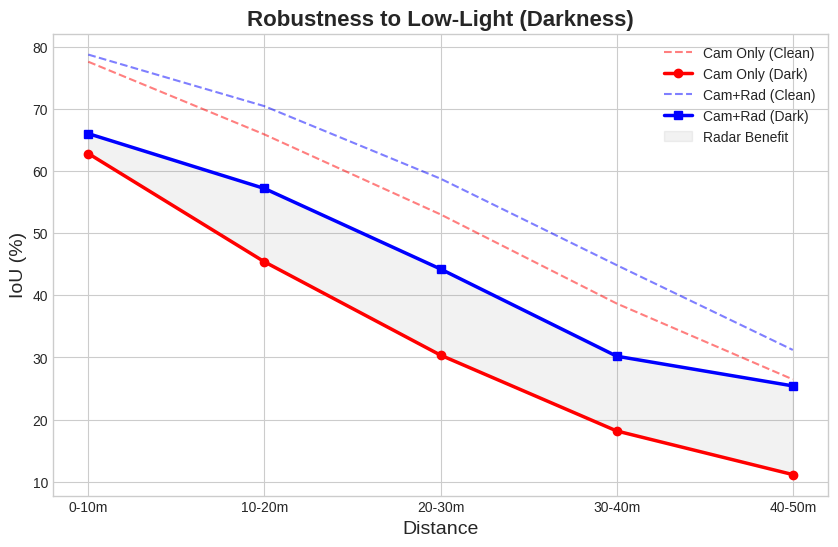

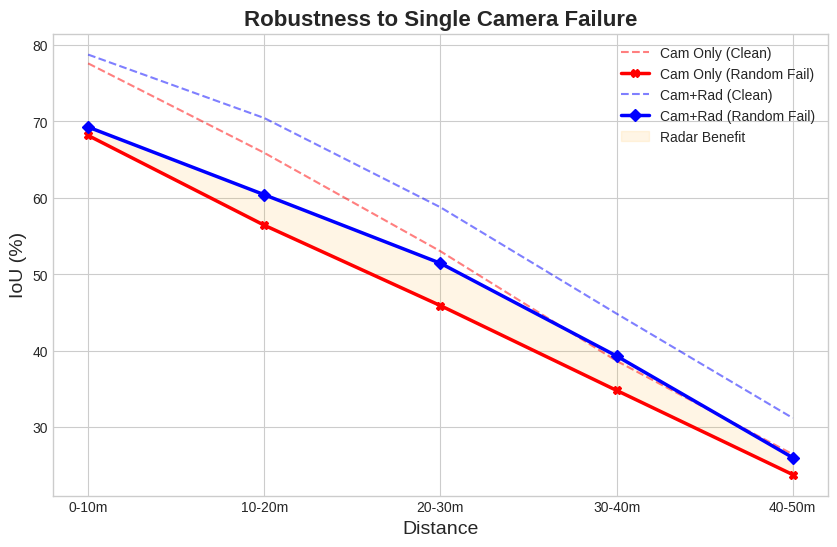

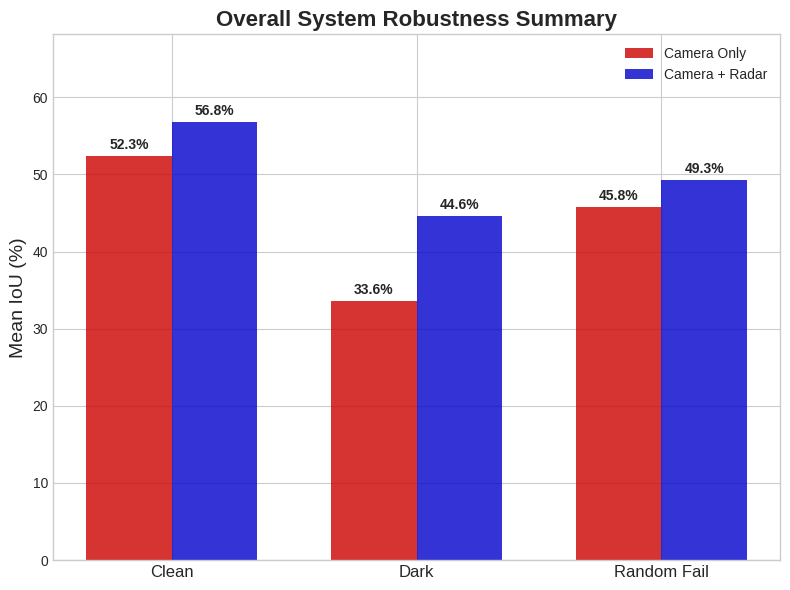

Kuvat luotu: final_darkness.png, final_random_fail.png, final_summary_bar.png


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import ast
import os

def visualize_all_results():
    filename = 'robustness_final_results.txt'

    if not os.path.exists(filename):
        print(f"Error: {filename} not found.")
        return

    # Tietorakenteet tuloksille
    results = {
        'clean': {'cam': [], 'rad': []},
        'dark': {'cam': [], 'rad': []},
        'random_fail': {'cam': [], 'rad': []}
    }

    means = {
        'clean': {'cam': 0, 'rad': 0},
        'dark': {'cam': 0, 'rad': 0},
        'random_fail': {'cam': 0, 'rad': 0}
    }

    with open(filename, 'r') as f:
        lines = f.readlines()

    current_mode = None
    current_radar = None

    for line in lines:
        if "Experiment:" in line:
            if "CLEAN" in line: current_mode = 'clean'
            elif "DARK" in line: current_mode = 'dark'
            elif "RANDOM_FAIL" in line: current_mode = 'random_fail'

            if "Radar=False" in line: current_radar = 'cam'
            elif "Radar=True" in line: current_radar = 'rad'

        if "RESULT_ARRAY" in line and current_mode and current_radar:
            list_str = line.split('=')[1].strip()
            data = ast.literal_eval(list_str)
            results[current_mode][current_radar] = data

        if "Mean IoU" in line and current_mode and current_radar:
            val = float(line.split(':')[1].strip())
            means[current_mode][current_radar] = val

    distances = ["0-10m", "10-20m", "20-30m", "30-40m", "40-50m"]
    x = np.arange(len(distances))
    plt.style.use('seaborn-v0_8-whitegrid')

    plt.figure(figsize=(10, 6))
    plt.plot(x, results['clean']['cam'], 'r--', alpha=0.5, label='Cam Only (Clean)')
    plt.plot(x, results['dark']['cam'], 'r-o', linewidth=2.5, label='Cam Only (Dark)')
    plt.plot(x, results['clean']['rad'], 'b--', alpha=0.5, label='Cam+Rad (Clean)')
    plt.plot(x, results['dark']['rad'], 'b-s', linewidth=2.5, label='Cam+Rad (Dark)')

    plt.fill_between(x, results['dark']['cam'], results['dark']['rad'], color='gray', alpha=0.1, label='Radar Benefit')

    plt.title('Robustness to Low-Light (Darkness)', fontsize=16, fontweight='bold')
    plt.ylabel('IoU (%)', fontsize=14); plt.xlabel('Distance', fontsize=14)
    plt.xticks(x, distances); plt.legend()
    plt.savefig('final_darkness.png', dpi=300)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x, results['clean']['cam'], 'r--', alpha=0.5, label='Cam Only (Clean)')
    plt.plot(x, results['random_fail']['cam'], 'r-X', linewidth=2.5, label='Cam Only (Random Fail)')
    plt.plot(x, results['clean']['rad'], 'b--', alpha=0.5, label='Cam+Rad (Clean)')
    plt.plot(x, results['random_fail']['rad'], 'b-D', linewidth=2.5, label='Cam+Rad (Random Fail)')

    plt.fill_between(x, results['random_fail']['cam'], results['random_fail']['rad'], color='orange', alpha=0.1, label='Radar Benefit')

    plt.title('Robustness to Single Camera Failure', fontsize=16, fontweight='bold')
    plt.ylabel('IoU (%)', fontsize=14); plt.xlabel('Distance', fontsize=14)
    plt.xticks(x, distances); plt.legend()
    plt.savefig('final_random_fail.png', dpi=300)
    plt.show()

    labels = ['Clean', 'Dark', 'Random Fail']
    cam_vals = [means['clean']['cam'], means['dark']['cam'], means['random_fail']['cam']]
    rad_vals = [means['clean']['rad'], means['dark']['rad'], means['random_fail']['rad']]

    x_bar = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 6))
    bar1 = plt.bar(x_bar - width/2, cam_vals, width, label='Camera Only', color='#cc0000', alpha=0.8)
    bar2 = plt.bar(x_bar + width/2, rad_vals, width, label='Camera + Radar', color='#0000cc', alpha=0.8)

    plt.ylabel('Mean IoU (%)', fontsize=14)
    plt.title('Overall System Robustness Summary', fontsize=16, fontweight='bold')
    plt.xticks(x_bar, labels, fontsize=12)
    plt.legend()
    plt.ylim(0, max(rad_vals)*1.2)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

    autolabel(bar1); autolabel(bar2)
    plt.tight_layout()
    plt.savefig('final_summary_bar.png', dpi=300)
    plt.show()

    print("Kuvat luotu: final_darkness.png, final_random_fail.png, final_summary_bar.png")

visualize_all_results()

Model robustness comparison under each camera

In [17]:
%cd /content/simple_bev

code_robust_cameras_fixed_v3 = """
import os
import time
import argparse
import numpy as np
import saverloader
from fire import Fire
from nets.segnet import Segnet
import utils.misc
import utils.improc
import utils.vox
import random
import nuscenesdataset
import torch
torch.multiprocessing.set_sharing_strategy('file_system')
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

random.seed(125)
np.random.seed(125)
torch.manual_seed(125)

# Asetukset
scene_centroid = torch.tensor([0.0, 1.0, 0.0]).reshape([1, 3]).float()
bounds = (-50, 50, -5, 5, -50, 50)
Z, Y, X = 200, 8, 200
max_dist = 50
num_bins = 5
bin_size = max_dist/num_bins

# --- KORJAUS: Nimet täytyy olla CAM_-etuliitteellä dataloaderia varten ---
CAM_NAMES = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT']

def apply_corruption(imgs, mode, cam_idx=None):
    # imgs shape: (B, T, S, C, H, W)
    if mode == 'clean':
        return imgs
    elif mode == 'specific_cam_fail':
        # Nollataan tietty kamera indeksin perusteella
        if cam_idx is not None:
            imgs = imgs.clone()
            imgs[:, :, cam_idx, :, :, :] = 0.0
        return imgs
    return imgs

def run_model(model, d, device='cuda:0', corruption='clean', cam_idx=None):
    metrics = {}

    imgs, rots, trans, intrins, pts0, extra0, pts, extra, lrtlist_velo, vislist, tidlist, scorelist, seg_bev_g, valid_bev_g, center_bev_g, offset_bev_g, radar_data, egopose = d

    # --- HÄIRIÖ ---
    imgs = apply_corruption(imgs, corruption, cam_idx)
    # --------------

    imgs = imgs[:,0].float().to(device) - 0.5
    seg_bev_g = seg_bev_g[:,0].to(device)
    valid_bev_g = valid_bev_g[:,0].to(device)

    B = imgs.shape[0]

    rots, trans, intrins = rots[:,0], trans[:,0], intrins[:,0]
    __p = lambda x: utils.basic.pack_seqdim(x, B)
    __u = lambda x: utils.basic.unpack_seqdim(x, B)
    intrins_ = __p(intrins)
    pix_T_cams_ = utils.geom.merge_intrinsics(*utils.geom.split_intrinsics(intrins_)).to(device)
    pix_T_cams = __u(pix_T_cams_)
    velo_T_cams = utils.geom.merge_rtlist(rots, trans).to(device)
    cam0_T_camXs = utils.geom.get_camM_T_camXs(velo_T_cams, ind=0)
    vox_util = utils.vox.Vox_util(Z, Y, X, scene_centroid=scene_centroid.to(device), bounds=bounds, assert_cube=False)

    rad_occ_mem0 = None
    if model.module.use_radar:
        radar_data = radar_data[:,0]
        rad_data = radar_data.to(device).permute(0, 2, 1)
        xyz_rad = rad_data[:,:,:3]
        meta_rad = rad_data[:,:,3:]
        cams_T_velo = __u(utils.geom.safe_inverse(__p(velo_T_cams)))
        rad_xyz_cam0 = utils.geom.apply_4x4(cams_T_velo[:,0], xyz_rad)
        rad_occ_mem0 = vox_util.voxelize_xyz_and_feats(rad_xyz_cam0, meta_rad, Z, Y, X, assert_cube=False)

    _, _, seg_bev_e, _, _ = model(
            rgb_camXs=imgs,
            pix_T_cams=pix_T_cams,
            cam0_T_camXs=cam0_T_camXs,
            vox_util=vox_util,
            rad_occ_mem0=rad_occ_mem0)

    seg_bev_e_round = torch.sigmoid(seg_bev_e).round()

    # IoU Calculation
    inter_map = seg_bev_e_round * seg_bev_g * valid_bev_g
    union_map = ((seg_bev_e_round + seg_bev_g) * valid_bev_g).clamp(0,1)

    intersection = inter_map.sum()
    union = union_map.sum()

    return intersection.item(), union.item()

def main(
        exp_name='eval_robust_cams',
        dset='mini',
        data_dir='/data/sets/nuscenes',
        init_dir='',
        use_radar=False,
        device_ids=[0],
):
    device = 'cuda:%d' % device_ids[0]

    final_dim = (int(224 * 2), int(400 * 2))
    data_aug_conf = {
        'final_dim': final_dim, 'H': 900, 'W': 1600,
        'cams': CAM_NAMES, # Nyt sisältää CAM_ prefixit
        'ncams': 6,
    }
    _, val_dataloader = nuscenesdataset.compile_data(
        dset, data_dir, data_aug_conf=data_aug_conf,
        centroid=scene_centroid.numpy(), bounds=bounds, res_3d=(Z,Y,X),
        bsz=1, nworkers=2, shuffle=False, seqlen=1, nsweeps=5, get_tids=True
    )
    val_dataloader.dataset.data_root = os.path.join(data_dir, dset)

    model = Segnet(Z, Y, X, use_radar=use_radar, use_metaradar=use_radar, encoder_type='res101')
    model = model.to(device)
    model = torch.nn.DataParallel(model, device_ids=device_ids)

    # Lataus
    if os.path.isdir(init_dir):
        files = [f for f in os.listdir(init_dir) if f.endswith('.pth')]
        if files:
            ckpt_path = os.path.join(init_dir, files[0])
            print(f"Loading from folder: {ckpt_path}")
            checkpoint = torch.load(ckpt_path, map_location=device)
            if 'model_state_dict' in checkpoint:
                model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
            else:
                model.module.load_state_dict(checkpoint, strict=False)
    else:
        print(f"Loading from file: {init_dir}")
        checkpoint = torch.load(init_dir, map_location=device)
        if 'model_state_dict' in checkpoint:
            model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
        else:
            model.module.load_state_dict(checkpoint, strict=False)

    model.eval()

    # --- LOOP THROUGH EACH CAMERA ---

    # 1. Ensin CLEAN baseline
    print(f"--- Running Baseline (CLEAN) | Radar={use_radar} ---")
    val_iterloader = iter(val_dataloader)
    inter_tot, union_tot = 0, 0
    for sample in val_iterloader:
        with torch.no_grad():
            i, u = run_model(model, sample, device, corruption='clean')
            inter_tot += i; union_tot += u
    clean_iou = (inter_tot / max(union_tot, 1.0)) * 100
    print(f"Baseline Clean IoU: {clean_iou:.2f}%")

    with open("robustness_cameras_results.txt", "a") as f:
        f.write(f"Experiment: CLEAN, Radar={use_radar}, IoU={clean_iou:.2f}\\n")

    # 2. Sitten jokainen kamera erikseen
    for cam_idx, cam_name in enumerate(CAM_NAMES):
        print(f"--- Testing Failure: {cam_name} (Idx {cam_idx}) | Radar={use_radar} ---")

        val_iterloader = iter(val_dataloader) # Reset dataloader
        inter_tot, union_tot = 0, 0

        for sample in val_iterloader:
            with torch.no_grad():
                i, u = run_model(model, sample, device, corruption='specific_cam_fail', cam_idx=cam_idx)
                inter_tot += i; union_tot += u

        fail_iou = (inter_tot / max(union_tot, 1.0)) * 100
        print(f"FAILED {cam_name} IoU: {fail_iou:.2f}%")

        # Tallennus
        with open("robustness_cameras_results.txt", "a") as f:
            f.write(f"Experiment: FAIL_{cam_name}, Radar={use_radar}, IoU={fail_iou:.2f}\\n")

if __name__ == '__main__':
    Fire(main)
"""

with open("eval_robust_cameras.py", "w") as f:
    f.write(code_robust_cameras_fixed_v3)

/content/simple_bev


In [18]:
CKPT_CAM = 'checkpoints/8x5_5e-4_rgb12_22:43:46'
CKPT_RAD = 'checkpoints/8x5_5e-4_rad25_18:55:34'

!rm robustness_cameras_results.txt

print("===== 1. CAMERA ONLY SENSITIVITY =====")
!python eval_robust_cameras.py --init_dir="$CKPT_CAM" --use_radar=False

print("\n===== 2. CAMERA + RADAR SENSITIVITY =====")
!python eval_robust_cameras.py --init_dir="$CKPT_RAD" --use_radar=True

rm: cannot remove 'robustness_cameras_results.txt': No such file or directory
===== 1. CAMERA ONLY SENSITIVITY =====
loading nuscenes...
making parser...
indices (323, 1)
NuscData: 323 samples. Split: train.
                   Augmentation Conf: {'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
data ready
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other 

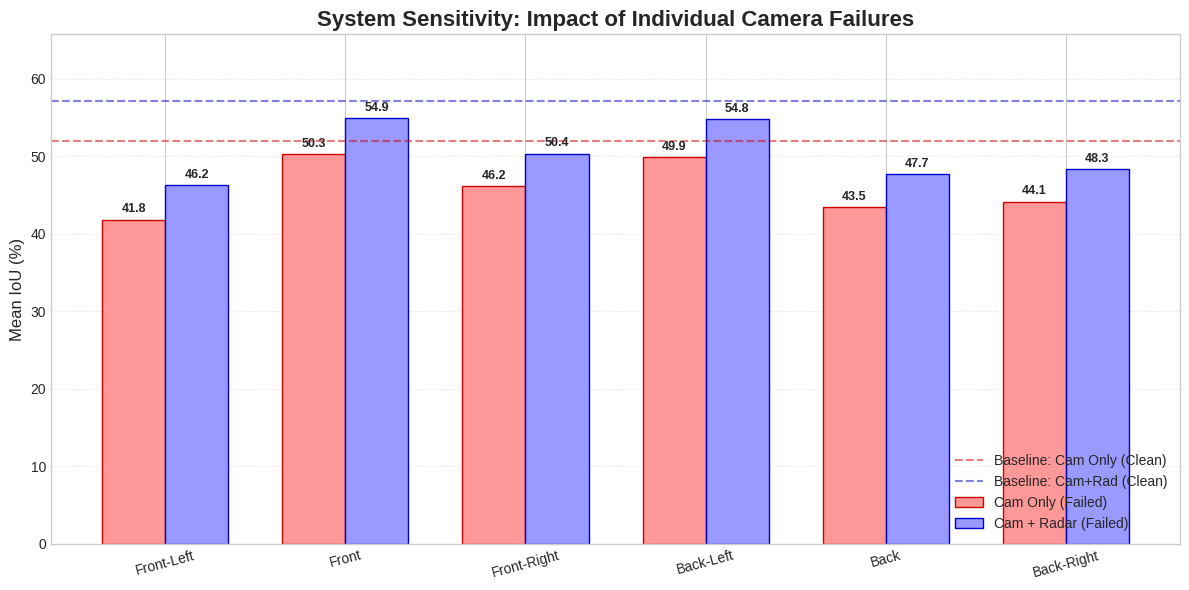

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os

def visualize_camera_sensitivity_v2():
    filename = 'robustness_cameras_results.txt'

    if not os.path.exists(filename):
        print(f"Error: {filename} is missing.")
        return

    cam_names = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT']
    display_names = ['Front-Left', 'Front', 'Front-Right', 'Back-Left', 'Back', 'Back-Right']

    clean_cam = 0
    clean_rad = 0

    res_cam = {name: 0.0 for name in cam_names}
    res_rad = {name: 0.0 for name in cam_names}

    with open(filename, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split(',')
        exp = parts[0].split(':')[1].strip()
        radar_stat = parts[1].strip()
        iou = float(parts[2].split('=')[1].strip())

        is_radar = 'True' in radar_stat

        if exp == 'CLEAN':
            if is_radar: clean_rad = iou
            else: clean_cam = iou
        elif exp.startswith('FAIL_'):
            cam_name = exp.replace('FAIL_', '')
            if cam_name in res_rad:
                if is_radar: res_rad[cam_name] = iou
                else: res_cam[cam_name] = iou

    cam_vals = [res_cam[c] for c in cam_names]
    rad_vals = [res_rad[c] for c in cam_names]

    x = np.arange(len(cam_names))
    width = 0.35

    plt.figure(figsize=(12, 6))

    plt.axhline(y=clean_cam, color='#cc0000', linestyle='--', alpha=0.5, label='Baseline: Cam Only (Clean)')
    plt.axhline(y=clean_rad, color='#0000cc', linestyle='--', alpha=0.5, label='Baseline: Cam+Rad (Clean)')

    rects1 = plt.bar(x - width/2, cam_vals, width, label='Cam Only (Failed)', color='#ff9999', edgecolor='#cc0000')
    rects2 = plt.bar(x + width/2, rad_vals, width, label='Cam + Radar (Failed)', color='#9999ff', edgecolor='#0000cc')

    plt.ylabel('Mean IoU (%)', fontsize=12)
    plt.title('Impact of Individual Camera Failures', fontsize=16, fontweight='bold')
    plt.xticks(x, display_names, rotation=15, fontsize=10)
    plt.ylim(0, max(clean_rad, clean_cam) * 1.15)
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle=':', alpha=0.6)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.savefig('visual_camera_sensitivity.png', dpi=300)
    plt.show()

visualize_camera_sensitivity_v2()